# 1. Data Wrangling with Python: Activity 5, page 116

In [1]:
#Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in the Boston housing dataset (given as a .csv file) from the local directory
df=pd.read_csv("Boston_housing.csv")

In [3]:
#Check the first 10 records.
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
#Find the total number of records
df.shape

(506, 14)

In [5]:
#Create a smaller DataFrame with columns that do not include CHAS, NOX, B, and LSTAT
df1=df[['CRIM','ZN','INDUS','RM','AGE','DIS','RAD','TAX','PTRATIO','PRICE']]

In [6]:
#Check the last seven records of the new DataFrame you just created
df1.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


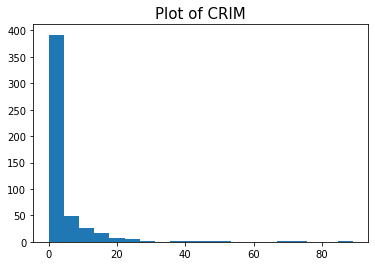

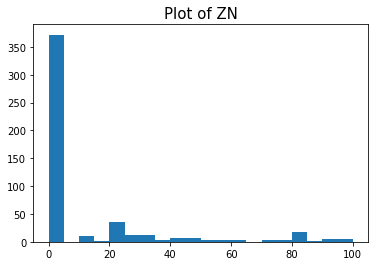

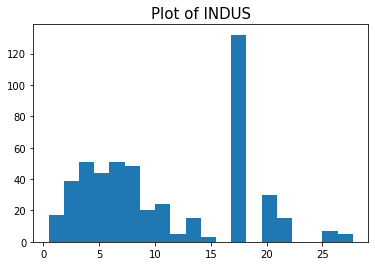

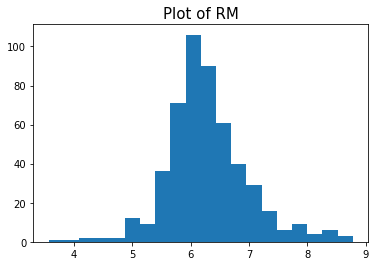

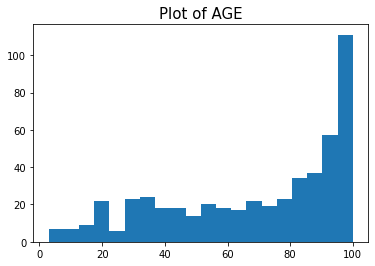

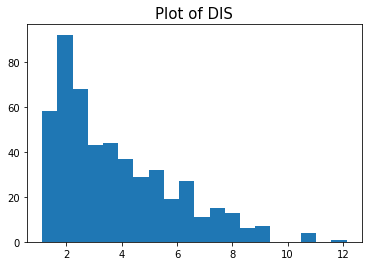

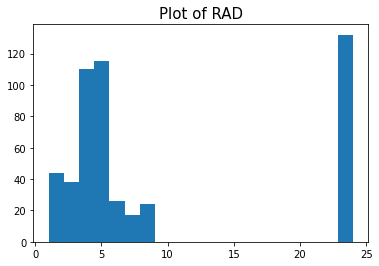

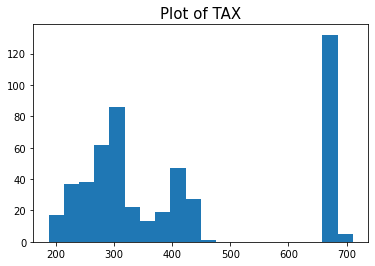

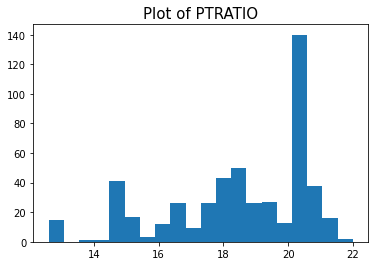

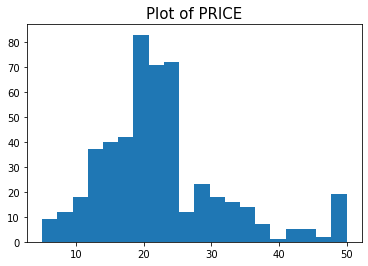

In [8]:
#Plot the histograms of all the variables (columns) in the new DataFrame
#Plot them all at once using a for loop. Try to add a unique title to a plot
for col in df1.columns:
    plt.title("Plot of "+col,fontsize=15)
    plt.hist(df1[col],bins=20)
    plt.show()

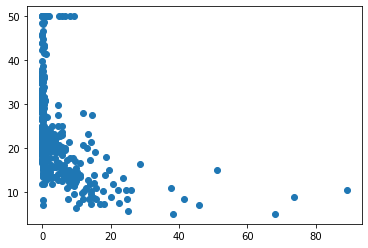

In [9]:
#Create a scatter plot of crime rate versus price
plt.scatter(df1['CRIM'],df1['PRICE'])
plt.show()

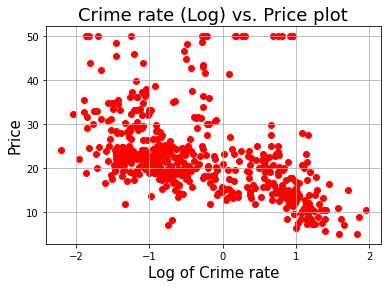

In [10]:
#Plot using log10(crime) versus price.
plt.scatter(np.log10(df1['CRIM']),df1['PRICE'],c='red')
plt.title("Crime rate (Log) vs. Price plot", fontsize=18)
plt.xlabel("Log of Crime rate",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid(True)
plt.show()

In [11]:
#calculate mean rooms per dwelling
df1['RM'].mean()

6.284634387351787

In [12]:
#calculate median age
df1['AGE'].median()

77.5

In [13]:
#calculate mean distances to five Boston employment centers
df1['DIS'].mean()

3.795042687747034

In [14]:
#percentage of houses with a low price (< $20,000)
low_price=df1['PRICE']<20
print(low_price)

pcnt=low_price.mean()*100
print("\nPercentage of house with <20,000 price is: ",pcnt)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505     True
Name: PRICE, Length: 506, dtype: bool

Percentage of house with <20,000 price is:  41.50197628458498


# 2. Data Wrangling with Python: Activity 6, page 171

In this activity, you will work with the Adult Income Dataset from the UCI machine learning portal. The Adult Income dataset has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a pandas DataFrame and do some practice on the advanced data wrangling you learned about in this chapter.
The aim of this activity is to practice various advanced pandas DataFrame operations, for example, for subsetting, applying user-defined functions, summary statistics, visualizations, boolean indexing, group by, and outlier detection on a real-life dataset. We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data downloading on your own so that you are familiar with the process.
Here is the URL for the dataset: https://archive.ics.uci.edu/ml/machine-learning- databases/adult/.
Here is the URL for the description of the dataset and the variables: https://archive.ics. uci.edu/ml/machine-learning-databases/adult/adult.names.


In [15]:
#Load the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#Read the adult income dataset
df = pd.read_csv("adult_income_data.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [17]:
#Create a script that will read a text file line by line.
text_file = []
with open('adult_income_names.txt','r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        text_file.append(var)

In [18]:
text_file

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [19]:
#Add a name of Income for the response variable to the dataset.
text_file.append('Income')

In [21]:
df = pd.read_csv("adult_income_data.csv",names=text_file)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
#Find the missing values.
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [23]:
#Create a DataFrame with only age, education, and occupation by using subsetting
df_subset = df[['age','education','occupation','race']]
df_subset.head()

,age,education,occupation,race
0,39,Bachelors,Adm-clerical,White
1,50,Bachelors,Exec-managerial,White
2,38,HS-grad,Handlers-cleaners,White
3,53,11th,Handlers-cleaners,Black
4,28,Bachelors,Prof-specialty,Black


<AxesSubplot:>

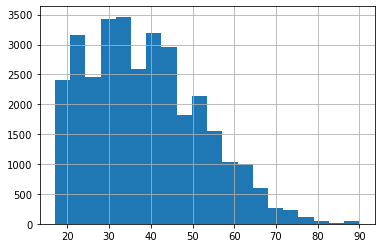

In [24]:
#Plot a histogram of age with a bin size of 20.
df_subset['age'].hist(bins=20)

In [25]:
#Create a function to strip the whitespace characters.
def strip_whitespace(s):
    return s.strip()

In [32]:
#Use the apply method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.
# Education column
df_subset['education_stripped']=df['education'].apply(strip_whitespace)
df_subset['education']=df_subset['education_stripped']
df_subset.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column
df_subset['occupation_stripped']=df['occupation'].apply(strip_whitespace)
df_subset['occupation']=df_subset['occupation_stripped']
df_subset.drop(labels=['occupation_stripped'],axis=1,inplace=True)

# Race column
df_subset['race_stripped']=df['race'].apply(strip_whitespace)
df_subset['race']=df_subset['race_stripped']
df_subset.drop(labels=['race_stripped'],axis=1,inplace=True)

<ipython-input-32-9acc2a26d8bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education_stripped']=df['education'].apply(strip_whitespace)
<ipython-input-32-9acc2a26d8bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education']=df_subset['education_stripped']
<ipython-input-32-9acc2a26d8bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [35]:
#Find the number of people who are aged between 30 and 50.
df_filtered=df_subset[(df_subset['race']=='Black') & (df_subset['age']>=30) & (df_subset['age']<=50)]
df_filtered.head()

,age,education,occupation,race
6,49.0,9th,Other-service,Black
10,37.0,Some-college,Exec-managerial,Black
13,32.0,Assoc-acdm,Sales,Black
22,35.0,9th,Farming-fishing,Black
71,31.0,Bachelors,Sales,Black


In [36]:
#Group the records based on age and education to find how the mean age is distributed.
df_subset.groupby(['race','education']).mean()

age
race               education              
Amer-Indian-Eskimo 10th          37.250000
                   11th          31.642857
                   12th          25.400000
                   1st-4th       45.750000
                   5th-6th       39.000000
...                                    ...
White              HS-grad       39.270777
                   Masters       44.338972
                   Preschool     40.289474
                   Prof-school   44.996109
                   Some-college  35.980989

[79 rows x 1 columns]

In [37]:
#Group by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile.
df_subset.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [38]:
#Use subset and groupby to find outliers.
occupation_stats= df_subset.groupby('occupation').describe()['age']

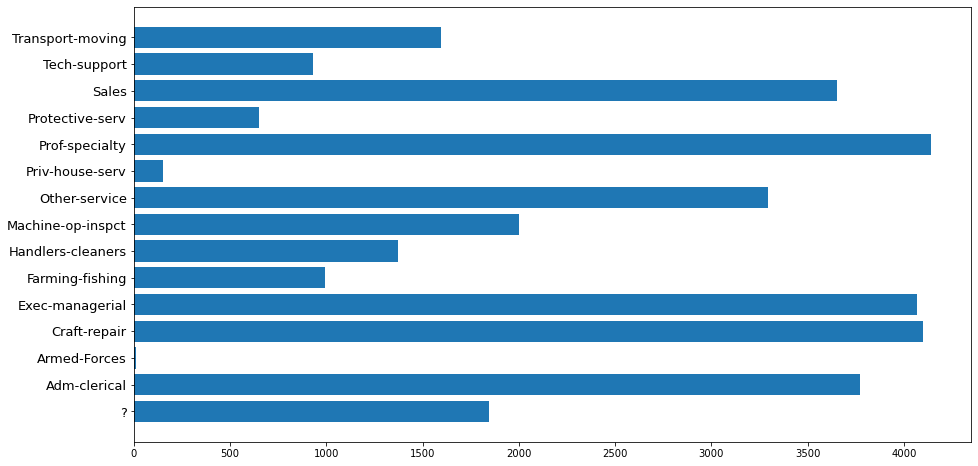

In [39]:
#Plot the values on a bar chart.
plt.figure(figsize=(15,8))
plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

In [41]:
#Merge the data using common keys.
df_one = df[['age','workclass','occupation']].sample(5,random_state=101)
df_two = df[['education','race','occupation']].sample(5,random_state=101)
df_merged = pd.merge(df_one,df_two,on='occupation',how='inner').drop_duplicates()
df_merged

,age,workclass,occupation,education,race
0,51,Private,Machine-op-inspct,HS-grad,White
1,19,Private,Sales,11th,White
2,40,Private,Exec-managerial,HS-grad,White
3,17,Private,Handlers-cleaners,10th,White
4,61,Private,Craft-repair,7th-8th,White


# 3. Create a series and practice basic arithmetic steps
a. Series 1 = 7.3, -2.5, 3.4, 1.5
 & Index = ‘a’, ‘c’, ‘d’, ‘e’

b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1
 & Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’

c. Add Series 1 and Series 2 together and print the results

d. Subtract Series 1 from Series 2 and print the results

In [42]:
#Create a series and practice basic arithmetic steps
#a. Series 1 = 7.3, -2.5, 3.4, 1.5
#i. Index = ‘a’, ‘c’, ‘d’, ‘e’
series_1 = {'a':7.3, 'c':-2.5, 'd':3.4, 'e':1.5}
series1 = pd.Series(data=series_1, index = ['a','c','d','e'])
series1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [46]:
#Create a series and practice basic arithmetic steps
#Series 2 = -2.1, 3.6, -1.5, 4, 3.1
#Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’
series_2 = {'a':-2.1 , 'c':3.6 , 'e':-1.5, 'f':4, 'g':3.1}
series2 = pd.Series(data=series_2, index = ['a', 'c', 'e', 'f', 'g'])
series2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [49]:
#Add Series 1 and Series 2 together and print the results
add_series = series1.add(series2, fill_value=0)
add_series

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

In [50]:
# Subtract Series 1 from Series 2 and print the results
subtract_series=series2.sub(series1, fill_value=0)
subtract_series

a   -9.4
c    6.1
d   -3.4
e   -3.0
f    4.0
g    3.1
dtype: float64